In [1]:
import pandas as pd

df_users_limpio = pd.read_csv('Dataset/datos_users_limpio.csv')

### Familiarización con los datos

In [2]:
# Imprimimos todas las columnas del describe
pd.set_option('display.max_columns', 500)

df_users_limpio

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,anyo_reg,mes_reg,dia_reg,hora_reg
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",99,5,4.03,2,0,0,0,0,1,1,1,1,2,0,2013,10,8,23
1,4XChL029mKr5hydo79Ljxg,Jenna,33,48,22,16,Ninguno,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",1152,4,3.63,1,0,0,0,0,0,0,1,1,0,0,2013,2,21,22
2,bc8C_eETBWL0olvFSJJd0w,David,16,28,8,10,Ninguno,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",15,0,3.71,0,0,0,0,0,1,0,0,0,0,0,2013,10,4,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,30,4,14,Ninguno,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",525,5,4.85,1,0,0,0,0,0,2,0,0,1,0,2014,5,22,15
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",231,39,4.08,28,1,0,0,1,16,57,80,80,25,5,2013,10,23,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637133,oC4BjbB4I-wx5KBAO1k2Gg,Jiaxin,2,0,0,0,Ninguno,SinAmigos,0,0,4.50,0,0,0,0,0,0,0,0,0,0,0,2016,2,24,19
1637134,LKd_-BT2GMWp8_1ho18kOg,Wes,8,0,0,0,Ninguno,SinAmigos,0,0,4.00,0,0,0,0,0,0,0,0,0,0,0,2017,2,25,23
1637135,ib_elCBhGOamS0AALkh4Og,Lee,4,8,0,0,Ninguno,SinAmigos,0,0,3.40,0,0,0,0,0,0,0,0,0,0,0,2009,8,19,22
1637136,WV27LoSFDG_YmiDKTLKKLA,Melissa,1,1,0,0,Ninguno,SinAmigos,0,0,3.00,0,0,0,0,0,0,0,0,0,0,0,2018,10,15,17


Nos encontramos en un dataset de usuarios, por lo que cada línea fila del dataset es un usuario. Cabe destacar que todos los números de cada fila hacen referencia al total que ese usuario ha tenido en el sistema. Para entender correctamente qué significa cada atributo, vamos a explicarlos uno a uno y a exponer algunas suposición que nos hacemos apriori:

- **num_opiniones**: Opiniones que el usuario ha hecho en total a lo largo de su trayectoria. Un número elevado de opiniones puede significar muchos años siendo experto, muchos seguidores y con ser influencer. 


- **util, gracioso y guay**: Veces que el usuario ha sido puntuado como útil, gracioso o guay, respectivamente. Podría estar relacionado con número de seguidores, todos los tipos de likes e incluso número de opiniones. SOBRE OTRA GENTE.


- **experto**: Lista con los años en los que el usuario ha sido experto en el sistema. Las personas que no han sido experto (que son la mayoría), tienen el string "Ninguno".


- **amigos**: Lista de los ID de los amigos que tiene ese usuario. Algunos usuarios **no tienen amigos**. Esto es puntualizado con el string "SinAmigos".


- **num_amigos**: Número de amigos que tiene el usuario. Introducimos esta columna ya que tratar con la lista de amigos no es útil en la mayoría de los casos.


- **seguidores**: Número de seguidores que ese usuario tiene en total. Los usuarios con un número de seguidores elevado pueden ser significativos.


- **media_puntuacion**: Puntuación media que tiene el usuario da a opiniones de otras personas. Esta medida podría llegar a ser utilizada para diferenciar entre distintos tipos de usuarios. Personas con una media muy baja de puntuación podría suponer que son muy **críticos**.


- **like_X**: Todas las columnas de like se refieren al número de likes del tipo X que ha recibido el usuario a lo largo de su trayectoria en el sistema. Al igual que util, gracioso y guay, podría estar relacionado con número de opiniones y seguidores.


- **año_reg, mes_reg, etc...**: Fecha de registro fraccionada en año, mes, día y hora. Podría ser que hubiera días en los que se produjeran más registros a lo largo de la semana, **generando patrones interesantes**. En algunos momentos, se pueden producir **registros masivos** debido a algún evento especial (algún anuncio nuevo, se habla del sistema en la televisión, etc...)


<span style="color:red">Podríamos plantearnos añadir una nueva collumna que fuera hacer cuántos años ser registró el usuario en la aplicación ya que puede estar directamente relacionado con los años expertos. Esto es a largo plazo, para los modelos</span>

### Añadimos el número de likes total

Como todos los likes tienen un comportamiento parecido, vamos a hacer una nueva columna que tenga la suma de todos ellos.

In [3]:
# Introducimos la nueva columna "num_likes"
df_users_limpio["num_likes"] = df_users_limpio.iloc[:, 11:22].sum(axis = 1)
df_users_limpio

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,anyo_reg,mes_reg,dia_reg,hora_reg,num_likes
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",99,5,4.03,2,0,0,0,0,1,1,1,1,2,0,2013,10,8,23,8
1,4XChL029mKr5hydo79Ljxg,Jenna,33,48,22,16,Ninguno,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",1152,4,3.63,1,0,0,0,0,0,0,1,1,0,0,2013,2,21,22,3
2,bc8C_eETBWL0olvFSJJd0w,David,16,28,8,10,Ninguno,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",15,0,3.71,0,0,0,0,0,1,0,0,0,0,0,2013,10,4,0,1
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,30,4,14,Ninguno,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",525,5,4.85,1,0,0,0,0,0,2,0,0,1,0,2014,5,22,15,4
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",231,39,4.08,28,1,0,0,1,16,57,80,80,25,5,2013,10,23,7,293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637133,oC4BjbB4I-wx5KBAO1k2Gg,Jiaxin,2,0,0,0,Ninguno,SinAmigos,0,0,4.50,0,0,0,0,0,0,0,0,0,0,0,2016,2,24,19,0
1637134,LKd_-BT2GMWp8_1ho18kOg,Wes,8,0,0,0,Ninguno,SinAmigos,0,0,4.00,0,0,0,0,0,0,0,0,0,0,0,2017,2,25,23,0
1637135,ib_elCBhGOamS0AALkh4Og,Lee,4,8,0,0,Ninguno,SinAmigos,0,0,3.40,0,0,0,0,0,0,0,0,0,0,0,2009,8,19,22,0
1637136,WV27LoSFDG_YmiDKTLKKLA,Melissa,1,1,0,0,Ninguno,SinAmigos,0,0,3.00,0,0,0,0,0,0,0,0,0,0,0,2018,10,15,17,0


In [4]:
# Reorganizamos la columnas
cols = df_users_limpio.columns.tolist()
cols = cols[:22] + cols[-1:] + cols[22:-1]

print(cols)
# Asignamos el nuevo orden de columnas al dataframe
df_users_limpio = df_users_limpio[cols]

['usuario_id', 'nombre', 'num_opiniones', 'util', 'gracioso', 'guay', 'experto', 'amigos', 'num_amigos', 'seguidores', 'media_puntuacion', 'like_moda', 'like_extras', 'like_perfil', 'like_formato', 'like_lista', 'like_comentario', 'like_simple', 'like_guay', 'like_divertido', 'like_textos', 'like_fotos', 'num_likes', 'anyo_reg', 'mes_reg', 'dia_reg', 'hora_reg']


### Análisis descriptivo de los datos

In [5]:
# Hacemos el análisis descriptivo de esta forma para quitar la notación científica
df_users_limpio.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,num_opiniones,util,gracioso,guay,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,mes_reg,dia_reg,hora_reg
count,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06
mean,22.2877,40.5277,17.9178,21.8805,45.7152,1.46565,3.68146,2.24223,0.332595,0.213513,0.190208,0.0835849,1.50394,3.09027,3.10682,3.10682,1.16533,1.13843,16.1737,2013.47,6.4201,15.7372,12.5857
std,76.9224,470.242,330.35,401.968,137.863,15.6832,1.15104,80.2182,13.6785,16.2668,12.698,10.8956,63.276,92.1142,88.2326,88.2326,32.6826,95.4914,517.442,2.60379,3.36132,8.80282,8.11387
min,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2004,1,1,0
25%,2,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,2012,4,8,4
50%,5,3,0,0,2,0,3.89,0,0,0,0,0,0,0,0,0,0,0,0,2014,6,16,16
75%,15,13,3,3,39,0,4.6,0,0,0,0,0,0,0,0,0,0,0,1,2015,9,23,20
max,13278,154202,130207,148658,14995,9538,5,34167,13500,14173,13654,12669,57833,52103,32266,32266,15442,82602,277077,2018,12,31,23


Observando la tabla descriptiva de los datos, podemos obtener la siguiente información con importancia:

- **num_opiniones:** 
    - La mayor parte de los usuarios tienen un **número de opiniones relativamente bajo** (los tres primeros cuartiles están por debajo de 16 opiniones). 
    - **Número de opiniones máximo en todos los usuarios de 13.278**, bastante elevado con respecto al resto de usuarios. 
    - Aún habiendo un máximo muy elevado, la media y la desviación estándar no toman valores muy grandes, lo cual nos quiere decir que **no hay demasiada gente con muchas opiniones**.


- **util, gracioso y guay:** 
    - El **75% de los usuarios del sistema reciben "util"**. 
    - Solo el **50% reciben al menos un "gracioso" y "guay"**. 
    - Las tres columnas tienen un máximo muy elevado lo cual indica la **existencia de algunas opiniones virales o de usuarios con muchas opiniones muy útiles**.


- **num_amigos:** 
    - Hay un **25% de usuarios sin amigos**. 
    - Un **25% tiene más de 39 amigos**. 
    - La media es de 45 amigos, lo cual nos quiere decir que del 25% recién mencionado (el que tiene 39 amigos o más), debe haber gente con muchos amigos. 
    - El **máximo es muy elevado**, como en el resto de columnas recientemente mencionadas (14995 amigos). 


- **seguidores:** 
    - Como dato destacado, como mínimo el **75% de los usuarios NO tienen ningún seguidor** pero el **máximo de seguidores es muy elevado** (9538). 
    - Esto sumado a que la media y la desviación estándar son muy pequeñas, nos indica que hay un **número de usuarios muy pequeño con muchísimos seguidores (influencers)**.


- **media_puntuacion:**
    - Las puntuaciones son buenas en general. Al menos un **75% de los usuarios tienen como mínimo un 3 de media**.
    - Un **25% de los usuarios tiene menos de un 1 de media**, lo cual puede llegar a ser significativo. Las opiniones con notas tan bajas podrían tenerse en cuenta aparte para comprobar si son **spam** y no aportan nada.


- **Likes:** (Vamos a hablar de ellos todos juntos porque son muchos y se comportan de forma similar)
    - Como mínimo, el **50% de los usuarios reciben 0 likes de cualquier tipo** (atendiendo a la columna num_likes).
    - Un **25% de los usuarios del sistema reciben al menos 1 like** de cualquier tipo.
    - <span style="color:red">"like_guay" y "like_divertido" tienen exactamente la misma desviación, media, máximo y mínimo. Esto podría ser un error una redundancia en la base de datos.</span>
    - El like con el máximo más alto es **"like_fotos"**. Esto puede ser un indicio no solo de que este like es el que más se utiliza, sino también que **la gente del sistema están normalmente más interesada en las fotografías**
    - El like con el máximo más bajo es **"like_lista"**. No sabemos a qué hace referencia este tipo de like, pero parece que las "listas" son las menos interesantes para los usuarios.
    
    
<span style="color:red">Podríamos contar el número de likes total de todos los tipos de likes para ver cuál es el más utilizado. También puede servir para ver cuál es el tema más interesante para la mayoría de las personas.</span>

## Adición de atributos

A la hora de analizar los datos, han aparecido algunas ideas sobre nuevos atributos que podrían ser valiosos:

- **num_likes**: Numero total de likes. Lo hemos añadido con anterioridad para que se pudieran analizar mejor todos los demás tipos de likes.

- **anyoExperto**: Número de años en los que un usuario ha sido experto. Actualmente se tiene una lista con los años en los que ha sido experto, lo que dificulta su uso.

- **experiencia**: Experiencia del usuario en años. Se tiene el año en el que se registró pero tener los años de experiencia nos permitiría usarlo directamente.


### Año Experto

In [6]:
# Introducimos la nueva columna "anyoExperto"

df_users_limpio["anyoExperto"] = df_users_limpio["experto"].apply(lambda x: 0 if x == "Ninguno" else x.count(',') + 1)

/home/david/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# Reorganizamos la columnas
cols = df_users_limpio.columns.tolist()
cols = cols[:7] + cols[-1:] + cols[7:-1]

# Asignamos el nuevo orden de columnas al dataframe
df_users_limpio = df_users_limpio[cols]

In [8]:
# Introducimos la nueva columna "experiencia"

df_users_limpio["experiencia"] = df_users_limpio["anyo_reg"].apply(lambda x: 2018 - x)

In [9]:
# Reorganizamos la columnas
cols = df_users_limpio.columns.tolist()
cols = cols[:25] + cols[-1:] + cols[25:-1]

# Asignamos el nuevo orden de columnas al dataframe
df_users_limpio = df_users_limpio[cols]

In [10]:
df_users_limpio

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,anyoExperto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,experiencia,mes_reg,dia_reg,hora_reg
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,84,17,25,"2015,2016,2017",3,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",99,5,4.03,2,0,0,0,0,1,1,1,1,2,0,8,2013,5,10,8,23
1,4XChL029mKr5hydo79Ljxg,Jenna,33,48,22,16,Ninguno,0,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",1152,4,3.63,1,0,0,0,0,0,0,1,1,0,0,3,2013,5,2,21,22
2,bc8C_eETBWL0olvFSJJd0w,David,16,28,8,10,Ninguno,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",15,0,3.71,0,0,0,0,0,1,0,0,0,0,0,1,2013,5,10,4,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,30,4,14,Ninguno,0,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",525,5,4.85,1,0,0,0,0,0,2,0,0,1,0,4,2014,4,5,22,15
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,1114,279,665,"2015,2016,2017,2018",4,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",231,39,4.08,28,1,0,0,1,16,57,80,80,25,5,293,2013,5,10,23,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637133,oC4BjbB4I-wx5KBAO1k2Gg,Jiaxin,2,0,0,0,Ninguno,0,SinAmigos,0,0,4.50,0,0,0,0,0,0,0,0,0,0,0,0,2016,2,2,24,19
1637134,LKd_-BT2GMWp8_1ho18kOg,Wes,8,0,0,0,Ninguno,0,SinAmigos,0,0,4.00,0,0,0,0,0,0,0,0,0,0,0,0,2017,1,2,25,23
1637135,ib_elCBhGOamS0AALkh4Og,Lee,4,8,0,0,Ninguno,0,SinAmigos,0,0,3.40,0,0,0,0,0,0,0,0,0,0,0,0,2009,9,8,19,22
1637136,WV27LoSFDG_YmiDKTLKKLA,Melissa,1,1,0,0,Ninguno,0,SinAmigos,0,0,3.00,0,0,0,0,0,0,0,0,0,0,0,0,2018,0,10,15,17


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure(figsize=(15,10))

ax = fig.add_subplot(2, 2, 1)
ax = sns.countplot(x="mes_reg", data=df_users_limpio, palette="Blues_d")
plt.title("Numero de registros por mes")

ax = fig.add_subplot(2, 2, 2)
ax = sns.countplot(x="hora_reg", data=df_users_limpio, palette="Blues_d")
plt.title("Numero de registros por hora")

ax = fig.add_subplot(2, 2, 3)
ax = sns.countplot(x="anyo_reg", data=df_users_limpio, palette="Blues_d")
plt.title("Numero de registros por año")

Text(0.5, 1.0, 'Numero de registros por año')

<span style="color:red">Comparar estas gráficas con las que aparecen en el otro dataset</span>

## Clusterización

Con el objetivo de comenzar el análisis, intentamos generar una serie de histogramas de aquellas columnas que nos parecieran más útiles y que pensábamos que nos podían dar más información acerca de cómo de comportan los clientes.

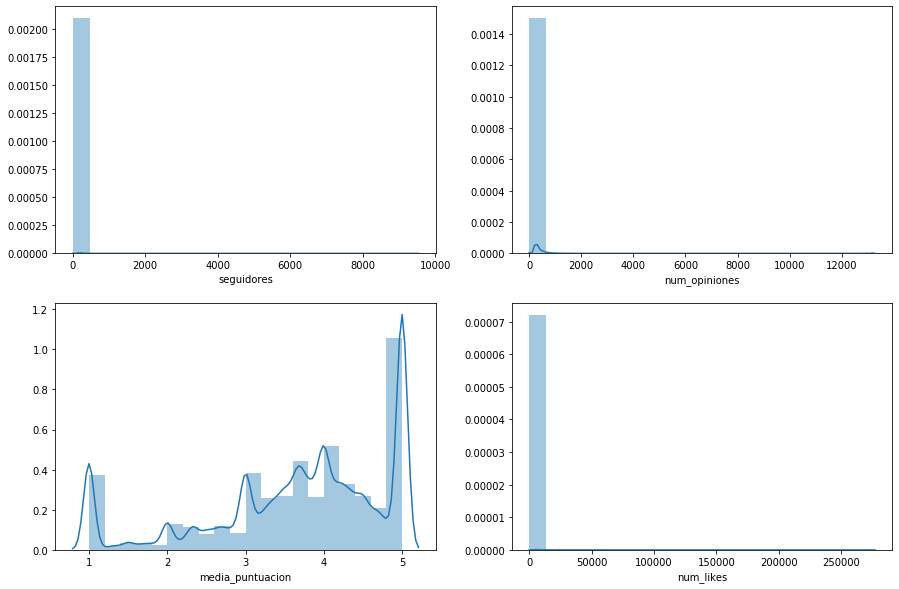

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure(figsize=(15,10))

ax = fig.add_subplot(2, 2, 1)
ax = sns.distplot(df_users_limpio['seguidores'], bins = 20);

ax = fig.add_subplot(2, 2, 2)
ax = sns.distplot(df_users_limpio['num_opiniones'], bins = 20);

ax = fig.add_subplot(2, 2, 3)
ax = sns.distplot(df_users_limpio['media_puntuacion'], bins = 20);

ax = fig.add_subplot(2, 2, 4)
ax = sns.distplot(df_users_limpio['num_likes'], bins = 20);

Los histogramas que obtenemos son anómalos por varios motivos:
- Según los histogramas, por ejemplo, no existe prácticamente ningún usuario con una cantidad de likes superior a 50.000. Obviamente, esto es imposible, ya que en el análisis previo nos hemos percatado de que existen varias personas que sí cumplen esta condición. En este caso, nos encontramos ante un problema de representación de la información y de posible clusterización; la cantidad de personas con muy pocos likes, muy pocas opiniones y muy pocos seguidores es **realmente alta**, por lo que deberíamos tratarlos por separado.


- El único histograma que aparece distinto es el de puntuación. Básicamente, esto se debe a que muchos usuarios que no reciben likes, no tienen seguidores y no tienen opiniones, sí puntúan otras opiniones. Como recordatorio, la media de puntuación hace referencia a **la media de puntuación que el usuario le ha dado a otras personas**. En estos histogramas, lo que está ocurriendo es que las distribuciones de los datos de los usuarios más frecuentes (los que menos likes, seguidores y opiniones tienen) destacan frente al resto de distribuciones. Por este motivo, podemos ver que, por ejemplo en el número de likes, la barra próxima al 0 es tan alta.

Al tener una cantidad de datos tan extremadamente alta, es normal que nos encontremos con este problema. La forma de abordar estos temas es mediante el uso de **clusterización** con el objetivo de separar instancias (en este caso, usuarios) en distintas categorías. De esta forma, podremos sacar conclusiones más precisas.

Con la clusterización que planteamos pretendemos diferenciar entre personas populares y personas no tan populares, lo que hemos denominado **"influencers"**. Después de haber estado pensando en qué variables pueden ser las más acertadas para hacer la clusterización, llegamos a las siguientes conclusiones:

- **seguidores**: Pensamos que es una de las variables más importantes para diferenciar entre distintos tipos de usuarios según popularidad. Sabemos que la gran mayoría de los usuarios no tienen apenas seguidores o directamente no tienen, pero esto puede permitirnos diferenciar a usuarios más alejados de lo normal que puedan tener utilidad ("influencers").


- **num_likes**: Al igual que seguidores, consideramos que el número de likes es una variable muy importante. Los likes pueden ser capaces de diferenciar distintos tipos de usuarios. Se debe diferenciar entre personas que reciben muchos likes (personas que normalmente van a tener muchas publicaciones o seguidores, o algo parecido) y personas con menos likes. Una persona que recibe muchos likes puede recibirlos ya que tiene muchas opiniones o las pocas que tiene son muy visitadas por la gente.


- **num_opiniones**: Para diferenciar lo dicho anteriormente, necesitamos saber si tienen muchas o pocas opiniones. No podemos comparar al mismo nivel a aquellas personas que tienen muchas publicaciones con las que no tienen apenas.

Estas serían las columnas que tendríamos en cuenta en caso de hacer una clusterización con el objetivo previamente indicado. Somos conscientes de que hay variables que también podrían llegar a ser útiles, como por ejemplo los siguientes:

- **util, gracioso, guay y media de puntuación**: Las tres primeras variables son un número que indica la cantidad de veces que se ha puntuado una opinion como útil, graciosa o guay, respectivamente. La última (media de puntuación) indica la media de puntuación que el usuario le da a los negocios a los que acude. Estas cuatro variables pueden llegar a diferenciar entre **usuarios críticos y no tan críticos**. Para la tarea que mencionamos anteriormente (encontrar influencers), no nos son tan útiles estas variables, pero podríamos llegar a tenerlas en cuenta más adelante.


- **anyoExperto y experiencia**: Sería normal pensar que a medida que aumenta el número de años que se ha sido experto o el número de años desde el registro, las opiniones sean mejores y, por lo tanto, los likes también. Sin embargo, hay algunos casos en los que se tienen muchas opiniones, seguidores, etc.. pero no se ha sido experto ningún año. Un ejemplo de este caso es el siguiente:


In [13]:
df_users_limpio[df_users_limpio['num_likes'] > 200000]

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,anyoExperto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,experiencia,mes_reg,dia_reg,hora_reg
179457,JjXuiru1_ONzDkYVrHN0aw,Richard,1086,99162,77758,93938,"2011,2012,2013,2014,2015,2016,2017,2018",8,"MFI4twbiz8UJxU-XHSlH-g, Rjb-gVuAeS9h75Svz0aYsg...",4716,1434,4.12,16245,3637,5990,2829,2332,10139,52103,32266,32266,12128,44390,214325,2009,9,8,23,13
1146706,Tqm7Wu7IBJ1td3Ab5ZpUhw,Brian,1998,45970,35437,44267,Ninguno,0,"4P8EDoVkcSLJs2XP5DJIPg, N6tzBF-6Lx3Mip-w_C0E9g...",917,297,4.27,24328,13500,14173,13654,12669,15907,24928,29937,29937,15442,82602,277077,2009,9,1,1,2


Es un ejemplo muy concreto que hemos visto a lo largo de la experimentación, pero nos parece válido para justificar la idea mencionada en el punto anterior. Como se puede observar, Brian tiene 0 años como experto pero tiene una cantidad de "guay", "util" y likes realmente elevada.

## Comienza mike

df_users_limpio[df_users_limpio['seguidores'] > 8000]

MIKE NOS ESTA JODIENDO y está generando un cluster por su cuenta. Decidimos eliminar a mike ya que no nos aporta información valiosa generalizable.

df_users_limpio = df_users_limpio.drop(822302, axis=0)

## Termina Mike

Normalizamos las variables que nos interesan antes de hacer kmedias para que las distancias sean iguales en todos los casos. De esta forma, conseguimos que se le de la misma importancia a todas las variables que vamos a utilizar para clusterizar.

In [14]:
import pandas as pd
from sklearn import preprocessing

kmediasVar = ['seguidores', 'num_likes', 'num_opiniones']

x = df_users_limpio[kmediasVar].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_users_kmedias = pd.DataFrame(x_scaled, columns=kmediasVar)
df_users_kmedias

,seguidores,num_likes,num_opiniones
0,0.000524,0.000029,0.007155
1,0.000419,0.000011,0.002485
2,0.000000,0.000004,0.001205
3,0.000524,0.000014,0.001280
4,0.004089,0.001057,0.027188
...,...,...,...
1637133,0.000000,0.000000,0.000151
1637134,0.000000,0.000000,0.000603
1637135,0.000000,0.000000,0.000301
1637136,0.000000,0.000000,0.000075


Aplicamos el algoritmo KMedias con cuatro clusters puesto que nos parece la opción más adecuada después de haber probado con distintos números.

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_users_kmedias)

print(kmeans.cluster_centers_)
print(kmeans.labels_)
# plt.scatter(df_users_limpio['seguidores'], np.zeros(df_users_limpio['seguidores'].values.shape[0]), c=kmeans.labels_, cmap='rainbow')
# plt.show()


[[1.39089957e-03 4.26432645e-04 1.35518678e-02]
 [4.42818128e-05 5.58481052e-06 8.41821445e-04]
 [6.99131863e-03 3.77792234e-03 4.72150366e-02]
 [3.62376890e-02 3.33417343e-02 1.41738214e-01]]
[1 1 1 ... 1 1 1]


In [16]:
df_users_limpio['categoria'] = kmeans.labels_

En este gráfico se puede visualizar cómo se han generado los clusters utilizando las tres variables que hemos usado para hacer la clusterización. Aunque pueda que la distribución de los datos no es muy correcta, esta clusterización nos permite diferenciar entre distintos "niveles" de usuarios. Los usuarios del cluster más disperso son los más "populares", mientras que los que tienen el cluster más cercano al 0 son los menos populares. Así, podemos comenzar a hacer un análisis más profundo.

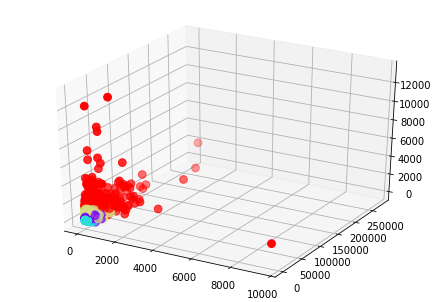

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df_users_limpio['seguidores'], df_users_limpio['num_likes'], df_users_limpio['num_opiniones'], c=df_users_limpio['categoria'], cmap='rainbow', s=60)

Para

In [18]:
df_users_limpio

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,anyoExperto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,experiencia,mes_reg,dia_reg,hora_reg,categoria
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,84,17,25,"2015,2016,2017",3,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",99,5,4.03,2,0,0,0,0,1,1,1,1,2,0,8,2013,5,10,8,23,1
1,4XChL029mKr5hydo79Ljxg,Jenna,33,48,22,16,Ninguno,0,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",1152,4,3.63,1,0,0,0,0,0,0,1,1,0,0,3,2013,5,2,21,22,1
2,bc8C_eETBWL0olvFSJJd0w,David,16,28,8,10,Ninguno,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",15,0,3.71,0,0,0,0,0,1,0,0,0,0,0,1,2013,5,10,4,0,1
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,30,4,14,Ninguno,0,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",525,5,4.85,1,0,0,0,0,0,2,0,0,1,0,4,2014,4,5,22,15,1
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,1114,279,665,"2015,2016,2017,2018",4,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",231,39,4.08,28,1,0,0,1,16,57,80,80,25,5,293,2013,5,10,23,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637133,oC4BjbB4I-wx5KBAO1k2Gg,Jiaxin,2,0,0,0,Ninguno,0,SinAmigos,0,0,4.50,0,0,0,0,0,0,0,0,0,0,0,0,2016,2,2,24,19,1
1637134,LKd_-BT2GMWp8_1ho18kOg,Wes,8,0,0,0,Ninguno,0,SinAmigos,0,0,4.00,0,0,0,0,0,0,0,0,0,0,0,0,2017,1,2,25,23,1
1637135,ib_elCBhGOamS0AALkh4Og,Lee,4,8,0,0,Ninguno,0,SinAmigos,0,0,3.40,0,0,0,0,0,0,0,0,0,0,0,0,2009,9,8,19,22,1
1637136,WV27LoSFDG_YmiDKTLKKLA,Melissa,1,1,0,0,Ninguno,0,SinAmigos,0,0,3.00,0,0,0,0,0,0,0,0,0,0,0,0,2018,0,10,15,17,1


In [64]:
# Hacemos el describe del dataframe de users y lo agrupamos por categoría (cada uno de los clusters). 
# Luego, ordenamos el describe por el número de instancias que tiene.
describe = df_users_limpio.groupby('categoria').describe().sort_values(by=[('num_opiniones', 'count')], ascending = False)

# Hacemos que tanto en df_users_limpio como en el describe, la categoria 0
# haga referencia a las personas "menos populares" y la categoría 3 a las 
# "más populares"
orderedIndices = describe.index.tolist()
df_users_limpio['categoria'] = df_users_limpio['categoria'].replace({orderedIndices[0]:0, orderedIndices[1]:1, orderedIndices[2]:2, orderedIndices[3]:3 })
describe.reset_index()

describe.iloc[1].unstack()

,count,mean,std,min,25%,50%,75%,max
num_opiniones,65939.0,180.084017,76.498955,29.00,119.00,155.00,222.00,414.0
util,65939.0,324.045936,433.866685,0.00,121.00,209.00,374.00,21707.0
gracioso,65939.0,138.131849,297.808643,0.00,30.00,62.00,135.00,21126.0
guay,65939.0,168.389375,359.999001,0.00,37.00,75.00,166.00,21527.0
anyoExperto,65939.0,2.001820,2.081296,0.00,0.00,2.00,3.00,12.0
num_amigos,65939.0,165.712644,260.671744,0.00,27.00,86.00,205.00,6017.0
seguidores,65939.0,13.279304,19.955941,0.00,3.00,8.00,16.00,579.0
media_puntuacion,65939.0,3.789640,0.391258,1.02,3.56,3.81,4.05,5.0
like_moda,65939.0,16.460001,86.439963,0.00,0.00,2.00,9.00,7338.0
like_extras,65939.0,2.575411,7.526754,0.00,0.00,1.00,3.00,526.0


Los clusters generados presentan las siguientes características:

- **Cluster 0**: 
    - La cantidad de usuarios en este cluster es realmente elevada. **Un total de 1.561.204 usuarios**.
    - En general, este tipo de usuarios tiene unos números realmente bajos; son los usuarios más casuales de la aplicación o que la dejaron después de un tiempo.
    - El número de likes que han recibido a lo largo de su trayectoria es próximo a cero en casi todas las instancias, exceptuando algunas muy escasas. 
    - Son los usuarios con la **media de puntuación más alta**, ya que posiblemente sean los **"menos críticos"** y dan notas elevadas por menos. Además, como podemos observar en los cuartiles de media_puntuacion, la mayoría de estos usuarios puntúan negocios ya que al menos un **75% puntúa con más de 3**.
    - Hay bastantes valores máximos que se salen un poco de lo que debería representar este cluster. Un ejemplo es el número de likes total. Parece ser que hay una persona con 20481 likes, lo cual es claramente un overlier de este cluster que debería pertenecer a otro. Posiblemente, esta persona ha sido agrupada en este cluster ya que tiene pocos seguidores o pocas opiniones.
    - El año de registro mínimo es 2013
    - El número de amigos es bastante variable. Se nota que no hemos hecho clustering por esa variable.
    
Para asegurarnos de que este cluster es correcto, vamos a hacer una comprobación. A continuación mostramos la instancia cuyo número de likes se salía un poco de lo habitual:

In [20]:
df_users_limpio[df_users_limpio['num_likes'] == 20481]

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,anyoExperto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,experiencia,mes_reg,dia_reg,hora_reg,categoria
1473587,mkbx55W8B8aPLgDqex7qgg,Momo,4,108,48,87,Ninguno,0,"uAL9HaTJHKJVLOaTullgpA, 59GSwMflQFllOAWvw0F5mw...",523,210,4.38,3134,144,146,95,80,1656,2743,4212,4212,606,3453,20481,2012,6,9,17,15,0


Como se puede observar, el número de publicaciones es extremadamente bajo en la instancia de Momo (4 publicaciones). Además, el número de seguidores no es extremadamente alto, solo tiene 210 seguidores. Estos dos valores relativamente bajos son los que han hecho que este usuario se quede en el primer cluster.

- **Cluster 1**: Estas son algunas de las cosas más interesantes que hemos visto en este cluster:

    - En primer lugar, **el número de opiniones medio es superior** para este segundo cluster, pasando de unas 11 por usuario a unas 180. En el primer cluster la varianza era pequeña y los cuartiles nos indican que una gran parte de los usuarios aportan pocas opiniones. Sin embargo, en este segundo cluster **el número de opiniones esta algo más distribuido**. 
    
    - Los atributos **util, gracioso y guay** reciben valores bajos en la mayoría de los casos, y se tiene un máximo muy grande, lo que nos indica que normalmente estos usuarios dan pocos de estos likes, pero hay algunos usuarios (o alguno) que dan muchos. Esto también ocurre en el anterior cluster.
    
    - En cuanto al **número de años que han sido expertos**, en este segundo cluster la media es de 2 años, superior al primer cluster, es decir, los usuarios del cluster analizado **son más expertos**.
    
    - Los usuarios de este cluster parecen tener muchos más **amigos**, pero no muchos mas **seguidores** que los usuarios de antes. Tanto en seguidores como amigos, se pueden observar que existen overliers, es decir, personas no muy populares pero que tienen seguidores o amigos. Estos casos podrían ser usuarios que tienen seguidores por **una opinion buena** que hicieron, o usuarios que podrían ser **bots**.
    
    - La **media de puntuación** no nos indica gran cosa, la media con respecto al anterior es la misma, pero no la varianza, esto nos podría indicar que estos usuarios **son más críticos**. En las gráficas sobre la puntuación de las que hablaremos más tarde sí pueden verse datos interesantes.
    
    - El **numero de likes** sí es interesante, la **media es superior** a la anterior y está **más distribuido**, en el caso anterior prácticamente no tenían likes a excepción de algún overlier y en este caso, aunque tambien existen overliers sí que hay personas con más likes. Esto se puede ver en que el maximo del primer cluster es 20481 pero la media es 1.54, y en este caso el máximo es 28402 y la media es 118.
    
    - Por último, los **años de experiencia** son interesantes, en comparación con el cluster anterior se tienen los mismos mínimos y máximos y la misma varianza, pero en este segundo cluster se tiene más media, es decir, **los usuarios de este cluster tienen más años de experiencia en la plataforma**.


Las diferencias que se han visto entre el cluster 0 y el 1 se van repitiendo con el resto de clusters, es decir, lo que se ha conseguido hacer con estos cluster es **dividir el conjunto total de usuarios en 4 grupos** con características que van ascendiendo. Por esta razón se ha decidido hablar de un conjunto de **características comunes** para todos los clusters.

   - Para atributos como el número de opiniones, el número de likes de util, gracioso y guay que han dado, el número de likes recibidos y el número de seguidores, ocurre algo **incremental** en todos los clusters. Para todos los clusters estas variables van aumentando en media y varianza, tiene sentido ya que lo que se está haciendo es contruir grupos que cada vez **contienen más casos especiales** (por lo que aumenta la varianza) y **con mayor valor** (aumenta la media).
   
   - En cuanto al **número de años como experto**, es muy interesante ver que **ascendiendo** en los clusters los usuarios cada vez han sido más años expertos, siendo esto indicativo de que **el último cluster tiene los usuarios más expertos**.
   
   - Otra característica muy llamativa es la **experiencia**, atributo que aumenta en cada cluster indicando, si lo acompañamos con las anteriores carácteristicas, que los usuarios que llevan **más años registrados** en la plataforma son los que de media han sido **expertos más años** y los que tienen **más seguidores**, opiniones... etc.
   
   - La media de puntuación no tiene aparentes diferencias entre los tres últimos clusters, pero sí de estos con el primero. Esto será algo que veamos después en más detalle acompañado con gráficas.


En conclusión, lo que se obtiene son cuatro clusters, en el primero se tienen usuarios con un bajo número de opiniones, seguidores... etc, y en los siguientes se **separan incrementalmente entre usuarios algo más avanzados**.




Algo que creemos que también la pena mostrar es la distribución de la media de puntuación en el cluster 0 con respecto a los otros clusters puesto que se fijándonos en los cuartiles se puede observar que hay diferencias entre ellos.

Text(0.5, 1.0, 'Cluster 3')

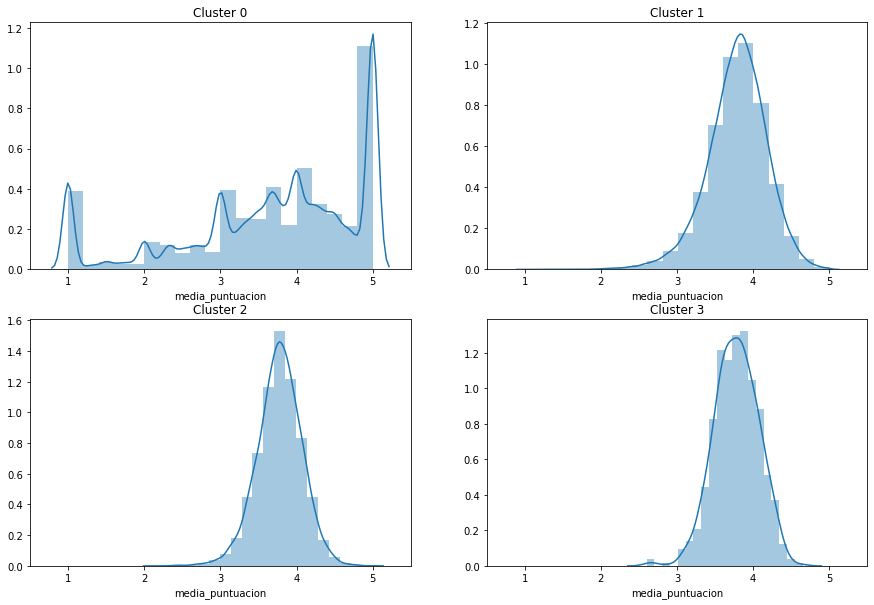

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure(figsize=(15,10))

ax = fig.add_subplot(2, 2, 1)
ax = sns.distplot(df_users_limpio[df_users_limpio['categoria'] == 0]['media_puntuacion'], bins = 20);
axes = plt.gca()
axes.set_xlim([0.5, 5.5])

plt.title("Cluster 0")

ax = fig.add_subplot(2, 2, 2)
ax = sns.distplot(df_users_limpio[df_users_limpio['categoria'] == 1]['media_puntuacion'], bins = 20);
axes = plt.gca()
axes.set_xlim([0.5, 5.5])
plt.title("Cluster 1")

ax = fig.add_subplot(2, 2, 3)
ax = sns.distplot(df_users_limpio[df_users_limpio['categoria'] == 2]['media_puntuacion'], bins = 20);
axes = plt.gca()
axes.set_xlim([0.5, 5.5])
plt.title("Cluster 2")

ax = fig.add_subplot(2, 2, 4)
ax = sns.distplot(df_users_limpio[df_users_limpio['categoria'] == 3]['media_puntuacion'], bins = 20);
axes = plt.gca()
axes.set_xlim([0.5, 5.5])
plt.title("Cluster 3")

Rápidamente, nos podemos dar cuenta de que estos usuarios son bastante optimistas con las puntuaciones. La distribución de los valores de media de puntuación en el caso del cluster 0 difiere considerablemente con respecto al resto de clusters. Incluso llegando al punto de no formar una normal. Algo que llama bastante la atención son los distintos picos que aparecen en la distribución del cluster 0:

- La barra que sale en la **puntuación media próxima al cinco**. Como se puede observar, es realmente alta. Esto se puede deber a que los usuarios de este cluster son realmente extremistas; si les gusta algo, le dan un 5 directamente.


- La barra contraria a la mencionada anteriormente es la que está próxima a 1. Siguiendo el mismo razonamiento de antes, estos usuarios son muy extremos y cuando algo no les gusta le dan una puntuación mínima muy frecuentemente. Sin embargo, la cantidad de gente que da 1 no es tan grande como la cantidad de gente que da 5.


- Por último, cabe destacar que en la media 2 y 4 también hay una pequeña barra que sobre sale con respecto al resto. Parece ser que hay gente no tan extremista pero que también dan valores bastante altos.

Podemos observar que en el resto de clusters, la media de la puntuación es muy parecida entre sí. En general, podemos decir que los usuarios de los cluster 1, 2 y 3 son más críticos puesto que poca gente da notas altas como un 5 y la gran mayoría se centra en valores medios próximos al 4 y 3.5. Además, prácticamente nadie da puntuaciones muy bajas en estos cluster.

## Análisis de overliers

Una vez hemos separado en clusters el dataset, vamos a comenzar a analizar cada uno de ellos por separado. Para comenzar, vamos a hacer boxplot de los seguidores, para poder identificar qué usuarios son más "famosos" y seguramente tengan las opiniones más visualizadas.

<Figure size 1080x720 with 0 Axes>

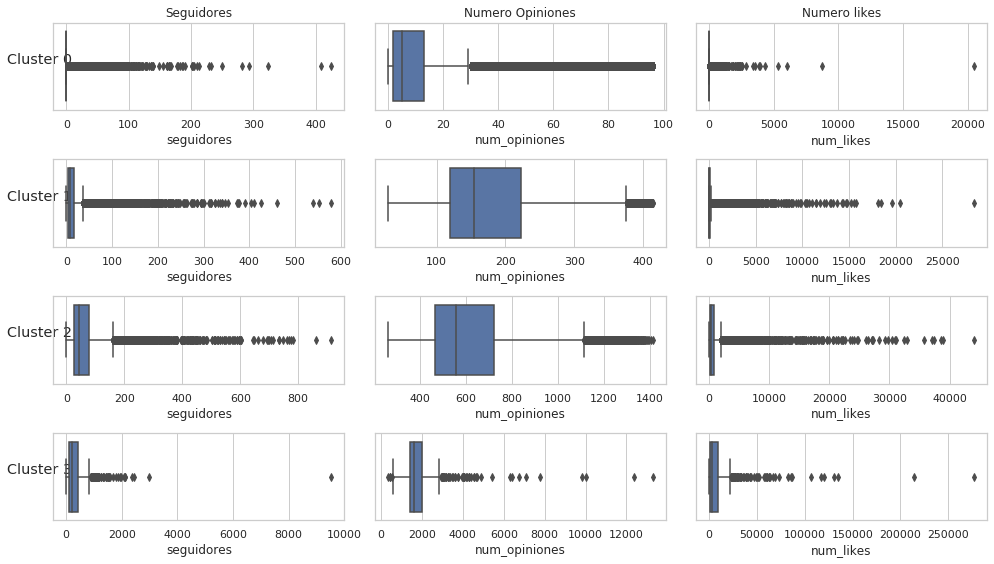

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure(figsize=(15,10))


rows = ['Cluster {}'.format(row) for row in range(0, 4)]
cols = ['{}'.format(col) for col in ['Seguidores', 'Numero Opiniones', 'Numero likes']]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 8))

# Cluster 0
ax = axes[0][0] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 0]["seguidores"], ax = ax)

ax = axes[0][1] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 0]["num_opiniones"], ax = ax)

ax = axes[0][2] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 0]["num_likes"], ax = ax)

# Cluster 1
ax = axes[1][0] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 1]["seguidores"], ax = ax)

ax = axes[1][1] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 1]["num_opiniones"], ax = ax)

ax = axes[1][2] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 1]["num_likes"], ax = ax)

# Cluster 2
ax = axes[2][0] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 2]["seguidores"], ax = ax)

ax = axes[2][1] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 2]["num_opiniones"], ax = ax)

ax = axes[2][2] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 2]["num_likes"], ax = ax)

# Cluster 3
ax = axes[3][0] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 3]["seguidores"], ax = ax)

ax = axes[3][1] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 3]["num_opiniones"], ax = ax)

ax = axes[3][2] 
sns.boxplot(x = df_users_limpio[df_users_limpio['categoria'] == 3]["num_likes"], ax = ax)

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')

fig.tight_layout()

A simple vista, parece que los clusters no han tenido demasiado efecto. Sin embargo, aunque parezca que no, el número de instancias que tenemos que manejar al mismo tiempo se ha reducido significativamente. Además, hemos conseguido separar el dataset en niveles que era nuestro objetivo primordial. Se pueden hacer algunas observaciones interesantes sobre los boxplot:

- En todas las gráficas de seguidores se puede observar como **hay una gran cantidad de overliers**. Esto podría llegar a significar que los clusters no se han hecho correctamente: los overliers del cluster 0 deberían estar en el cluster 1, los del cluster 1 en el cluster 2, etc... Aunque esto puede ser cierto, la cuestión es que **no solo debemos tener en cuenta la variable seguidores**. Como hemos utilizado las tres variables para hacer clustering, puede ser que las personas con muchos seguidores en el cluster 0, no tengan apenas likes o seguidores.


- En el caso de los seguidores, podemos comprobar como la caja y los bigotes del cluster 0 se encuentran mucho menos distribuidos que en el resto. Esto se debe a que en el cluster 0, la mayoría de las personas tienen un **número de seguidores próximo a 0**.


- El caso del cluster 3 es bastante especial ya que **parece** que no sigue la tendencia de los anteriores. Sin embargo, **esto no es así**. Realmente, lo que ocurre es que sus **overliers están tan dispersos** y tienen un rango tan elevado que el boxplot se ve deformado. Un ejemplo muy claro es el gran overlier que se puede ver en los seguidores del cluster 3. Estos overliers podrían llegar  ser eliminados, sin embargo preferimos analizarlos aparte ya que aportan información.


- En el boxplot del número de opiniones del cluster 3 se pueden observar overliers por abajo. Esto solo se puede ver en ese boxplot.


- Gracias a los boxplot podemos confirmar de nuevo cuál es la distribución de los datos en el número de opiniones (**una normal**)


- Por último, debemos mencionar que el número de likes del cluster 3 tiene los overliers más extremos de todos. Llegando incluso a 40.000 likes.

## Usuarios spammers o muy poco conocidos

Nos interesamos en buscar este tipo de usuarios debido a la siguiente gráfica.

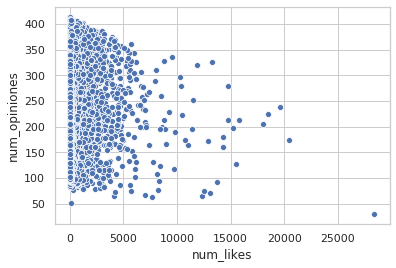

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.scatterplot(x = "num_likes", y = "num_opiniones", data = df_users_limpio[df_users_limpio['categoria'] == 1])


Este plot tiene unas características muy particulares.

- La mayoría de los usuarios no tienen ni muchos likes ni muchas opiniones. Esto dentro de lo que cabe es **normal**; la mayoría de la gente no escribe opiniones por lo que tampoco pueden recibir demasiados likes por simple estadística.

- A simple vista se puede observar que **obtener más likes no se directamente proporcional al número de opiniones**. Si nuestro objetivo es tener likes en la aplicación, lo que deberíamos hacer, siguiendo la gráfica, sería tener menos de 3000 likes aproximadamente. Esto es **anti-intuitivo** ya que lo normal sería pensar que cuantas más opiniones, más likes. Desconocemos el motivo de esto hasta ahora, así que vamos a intentar ver qué tipo de opiniones exponen estas personas. Sobre todo las más extremas.

- En el caso de los likes, podemos observar como la persona que más tiene solo ha escrito 2000 opiniones aproximadamente. Esto sigue potenciando lo anteriormente dicho.

Como ya hemos mencionado, para revisar estas anomalías, vamos a obtener los datos de las opiniones y vamos a intentar ver qué tipo de opiniones hacen estos usuarios.

In [ ]:
import pandas as pd

data_iterator = pd.read_csv("Dataset/large_data.csv", chunksize=100000)

chunk_list = []  

# Each chunk is in dataframe format
for data_chunk in data_iterator:  
    filtered_chunk = chunk_filtering(data_chunk)
    chunk_list.append(filtered_chunk)
    
filtered_data = pd.concat(chunk_list)

# Cosas INÚTILES

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.scatterplot(x = "num_opiniones", y = "seguidores", data = df_users_limpio)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters = 2, random_state = 0).fit(df_users_limpio[['seguidores', 'num_opiniones']])
print(kmeans.labels_)
print(kmeans.cluster_centers_)

<Figure size 1080x720 with 0 Axes>

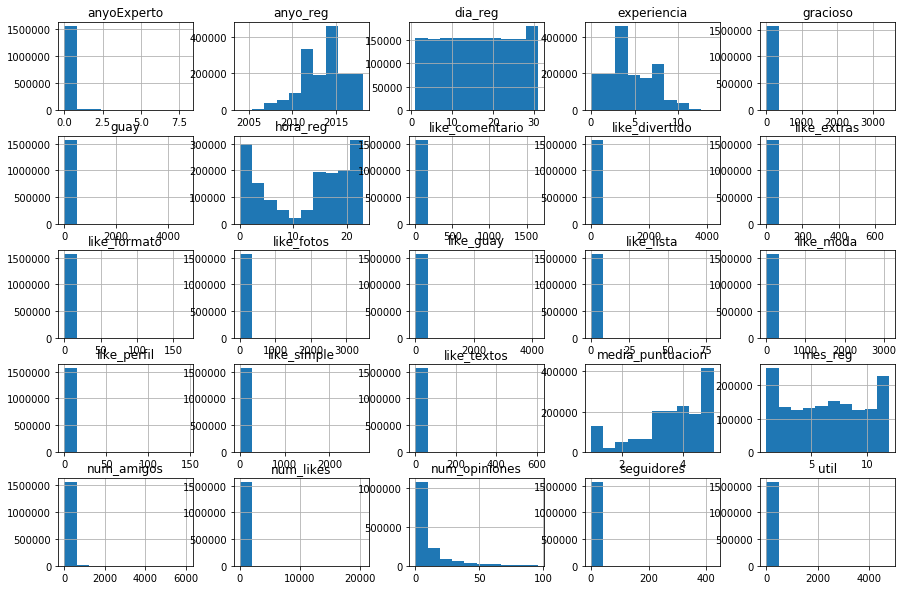

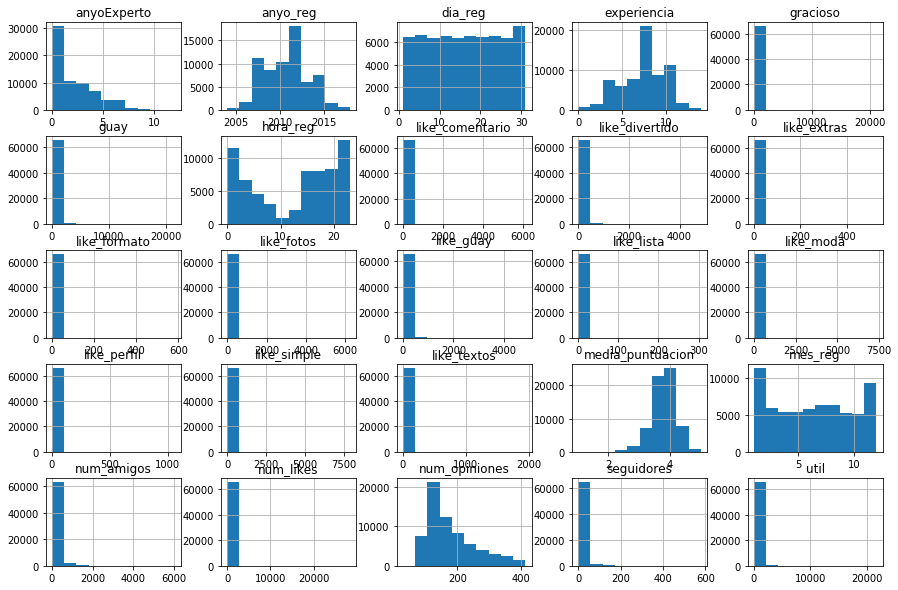

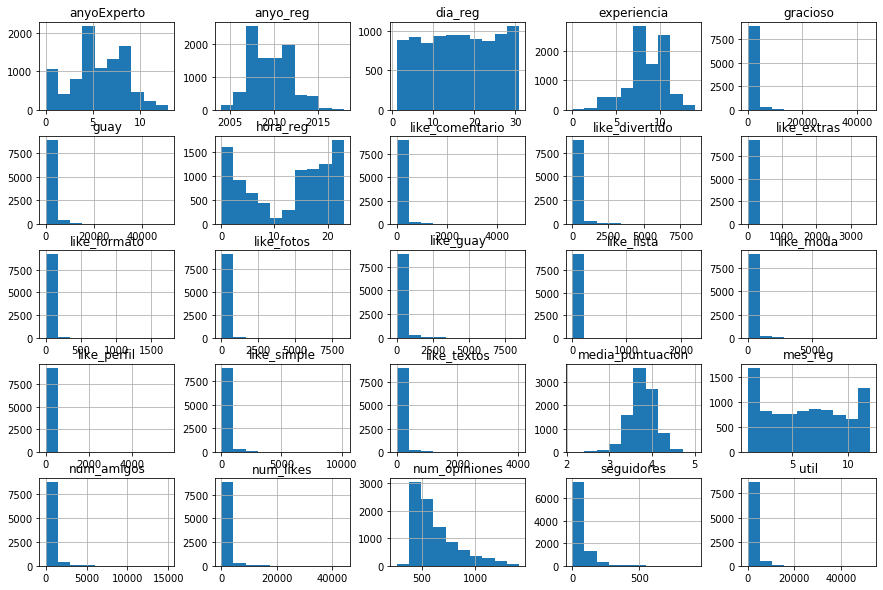

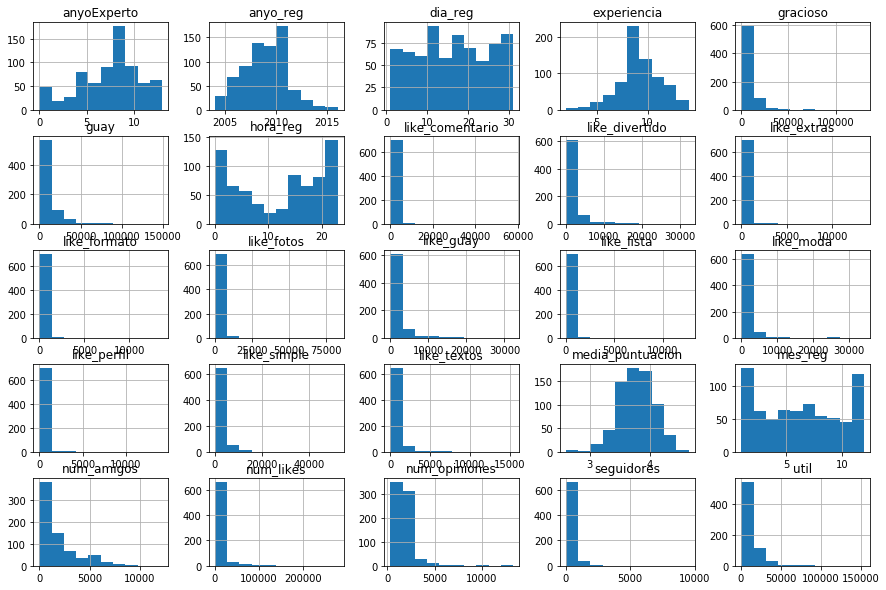

In [22]:
fig = plt.figure(figsize=(15,10))
ax = df_users_limpio.groupby('categoria').hist(figsize=(15, 10))
plt.show()

In [26]:
df_users_limpio[df_users_limpio["seguidores"] > 8000]

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,anyoExperto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,experiencia,mes_reg,dia_reg,hora_reg,categoria
822302,37cpUoM8hlkSQfReIEBd-Q,Mike,1634,19715,10085,13227,"2012,2013,2014,2015,2016,2017,2018",7,"C8vMgFk7K1luWh3tUY_g7A, i1KRBtPqEPqelfP5NaiRmw...",5591,9538,4.3,359,101,51,115,27,401,640,934,934,472,1493,5527,2009,9,4,25,14,3


Cosas que podemos hacer:
- Clusterización jerárquica 
- Hacer un cluster con los números de usuarios para poder discretizarlos correctamente y poder hacer boxplot y encontrar overlies. 
- Podríamos diferenciar en algún punto entre los usuarios que tienen alguna opinion y los usuarios que no.
- Hacer boxplot y distribuciones que nos puedan hacer detectar overlies.
    - 

- Detectar spammers reconociendo aquellas personas con muy poca puntuación y muchísimas opiniones.
- Detectar hackers que tengan media de puntuación de opiniones de 5 y muchísimas opiniones.
- Detectar influencers discretizando por el número de opiniones o de likes.
- Detectar personas clones. Que tengan el mismo nombre, los mismos elementos menos el id.

- Ver si desaparecen algunos tipos de likes debido al desuso. Al final la empresa se queda con unos pocos likes

- Discretizar entre negocios que han cerrado y los que no. Hacer análisis aparte
- Cuál es el negocio con la mayor puntuación
- Cuál es el negocio más frecuente.